In [10]:

import importlib
import helper_functions

importlib.reload(helper_functions)

<module 'helper_functions' from '/Users/umesh/Projects/TianFu/RomanceLab_LLM_workshop/helper_functions.py'>

### Install libraries

In [ ]:
# !pip install minicons
# !pip install nltk
# !pip install matplotlib

### Import libraries and functions

In [4]:
# Import "scorer" module from the minicons library, which provides functionalities for computing 
# log-probabilities and surprisal using pretrained transformer models
from minicons import scorer

# Load helper functions from the file helper_functions.py
from helper_functions import plot_surprisals

### Instantiate a model


In [ ]:
model_name = "HuggingFaceTB/SmolLM2-135M"

# Load the specified model IncrementalLMScorer is a wrapper around any causal (autoregressive) language model accessible via Hugging Face’s transformers.
lmScorer = scorer.IncrementalLMScorer(model_name)

In [ ]:
# if "gpt2" in model_name or "pythia" in model_name or "SmolLM" in model_name:
#     BOS = True
# else:
#     BOS = False

# lm = scorer.IncrementalLMScorer(model_name)

### Generate surprisal for tokens


In [ ]:
sent_garden_path_amb = "The horse raced past the barn fell."
sent_garden_path_unamb = "The horse that was raced past the barn fell."

In [ ]:
token_surprisal_amb = lmScorer.token_score(
    sent_garden_path_amb, 
    bos_token=True,
    prob=False,
    surprisal=True,
    bow_correction=True
)

token_surprisal_amb

[[('<|endoftext|>', 0.0),
  ('The', 3.5739221572875977),
  ('Ġhorse', 9.825536727905273),
  ('Ġraced', 8.5577974319458),
  ('Ġpast', 3.076159715652466),
  ('Ġthe', 1.0320630073547363),
  ('Ġbarn', 4.2486066818237305),
  ('Ġfell', 12.282438278198242),
  ('.', 4.281924247741699)]]

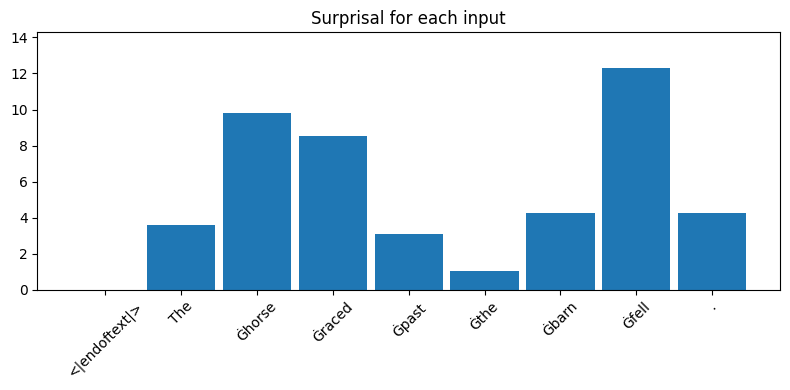

In [ ]:
plot_surprisals(token_surprisal_amb)

In [ ]:
token_surprisal_unamb = lmScorer.token_score(
    sent_garden_path_unamb, 
    bos_token=True,
    prob=False,
    surprisal=True,
    bow_correction=True
)

token_surprisal_unamb

[[('<|endoftext|>', 0.0),
  ('The', 3.5739221572875977),
  ('Ġhorse', 9.825536727905273),
  ('Ġthat', 3.042532444000244),
  ('Ġwas', 3.3407704830169678),
  ('Ġraced', 9.473713874816895),
  ('Ġpast', 8.069912910461426),
  ('Ġthe', 1.7469418048858643),
  ('Ġbarn', 5.721555709838867),
  ('Ġfell', 6.926654815673828),
  ('.', 4.736099720001221)]]

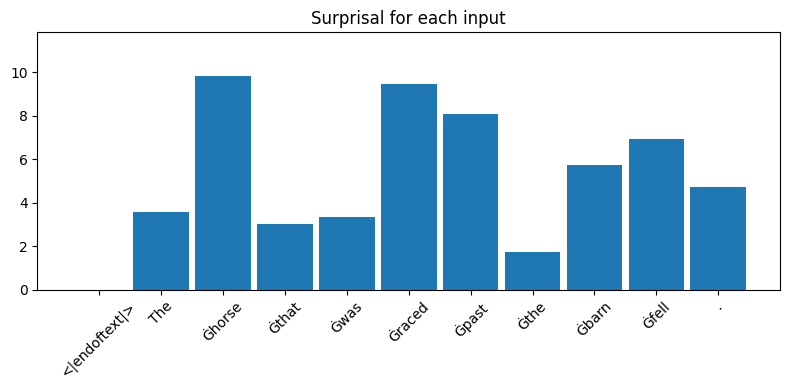

In [ ]:
plot_surprisals(token_surprisal_unamb)

### Generate surprisal for words


#### Load `TweetTokenizer` from `nltk` library

In [ ]:
from nltk.tokenize import TweetTokenizer
word_tokenizer = TweetTokenizer().tokenize

In [ ]:
word_surprisal_amb = lmScorer.word_score_tokenized(
    sent_garden_path_amb, 
    bos_token=True,
    tokenize_function=word_tokenizer,
    surprisal=True,
    bow_correction=True,
)

word_surprisal_amb

[[('The', 3.5739221572875977),
  ('horse', 9.825536727905273),
  ('raced', 8.5577974319458),
  ('past', 3.076159715652466),
  ('the', 1.0320630073547363),
  ('barn', 4.2486066818237305),
  ('fell', 12.282438278198242),
  ('.', 4.281924247741699)]]

In [ ]:
plot_surprisals(word_surprisal_amb, ymax=20)

NameError: name 'plot_surprisals' is not defined

<BR>
<BR>

### Exercise: Compare surprisal predictions for the following psycholinguistic effects
1. Object-Relative Clause (King & Just, 1991) → Harder than subject-relative clauses.
    - "The reporter that the senator attacked admitted the error."
    - "The reporter that attacked the senator admitted the error."

1. Negative Polarity Item Licensing (Xiang, et al. 2009) → Complexity in licensing “no” with downward-entailing contexts.
    - Grammatical: {No/Very few} restaurants that the local newspapers have recommended in their dining reviews have ever gone out of business
    - Ungrammatical (intrusive licensor): The restaurants that {no/very few} local newspapers have recommended in their dining reviews have ever gone out of business
    - Ungrammatical (no licensor): Most restaurants that the local newspapers have recommended in their dining reviews have ever gone out of business

1. Pronoun Resolution Difficulty (Garnham, 2001) → Ambiguity in pronoun referent.
    - "John told Bill that he was going to win."
    - "John told Mary that he was going to win."

1. Center-Embedding (Miller & Chomsky, 1963) → Processing load increases with nested clauses.
    - "The rat the cat the dog chased killed ate the cheese."




3. Negative Polarity Item (NPI) Licensing
Ungrammatical:

A student who some teacher liked ever passed the exam.
Grammatical alternative:
A student who no teacher liked ever passed the exam.
"Ever" correctly licensed in a negative context.
